In [1]:
### Junior Data Analyst Test Agate 
## Author : Aldo Wista Fadhilah
## Date : 04/11/2020

# Segment C. Study Case

Tim is new in Game Industry; He starts a new Job as Product Manager in the early 2019 at Agate and handles Game X. Game X has been running for 2 years, but currently in a decline either in performance or revenue. Game X is a game of Dungeon Crawling using gacha mechanics to get more character. **Normally this type of game uses Daily Login, Theme Based Event, Special Promo IAP Event such as Limited Item to get revenue and increase performance / make user came back to the game.**

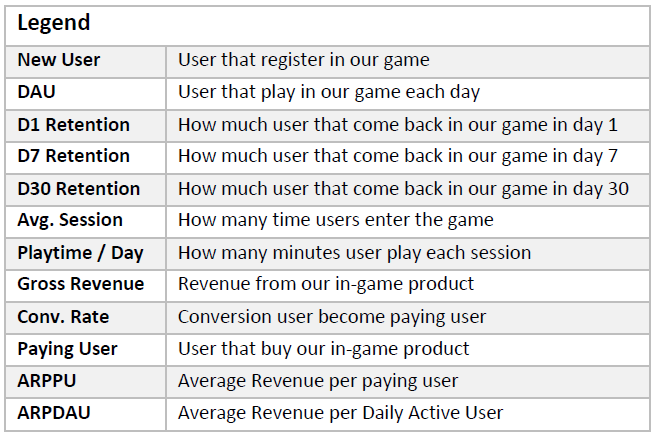

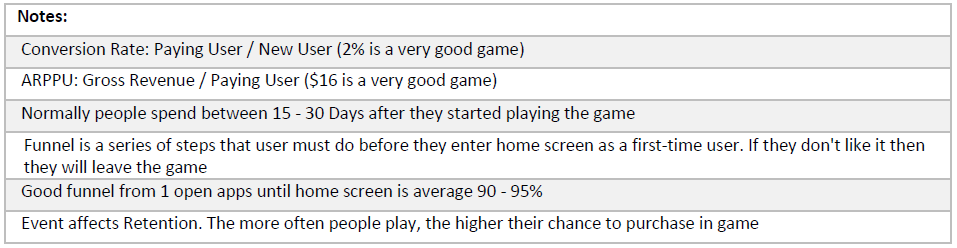

To understand Game X better, Tim checked previous Game X performance. The data is shown below.

2017 Data:

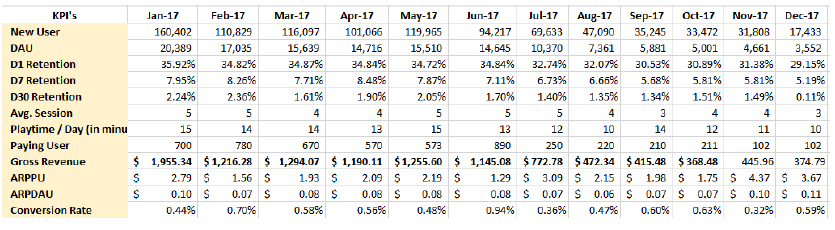

2018 Data:

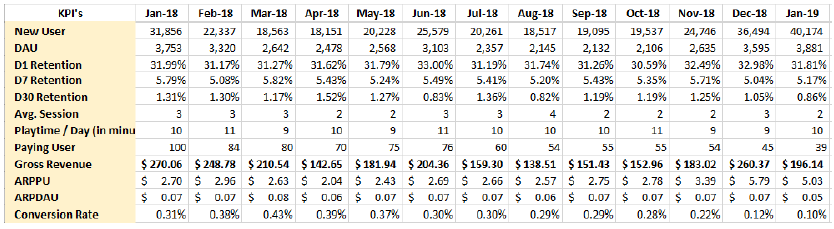

What made this case interesting is the data has shown that there is a decline of new user in 2018 compared to 2017. Tim knew “New User” is divided by 2 types (Organic User and Paid User). We can get “Paid User” from User Acquisition that is the job of Marketing Division. So, Tim went to Arif as the Marketing Lead to see the previous data of “User Acquisition”.

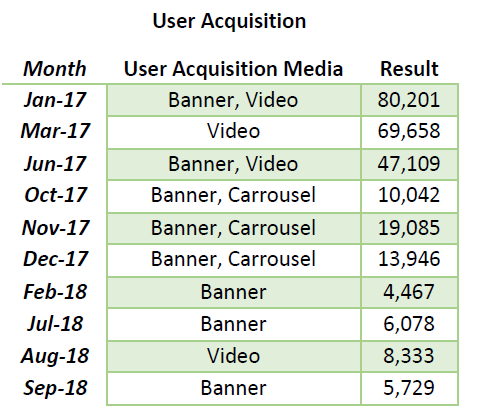

From data that provided by Arif, Tim curious why they do not do as many “user acquisition” in 2018 compare to 2017 and change user acquisition media in 2018. Arif explain that Ray as previous Vice PM decided to stop the campaign after Sandra as PM resign from Agate. To understand better how to improve Game X, Tim decide to look other supporting data

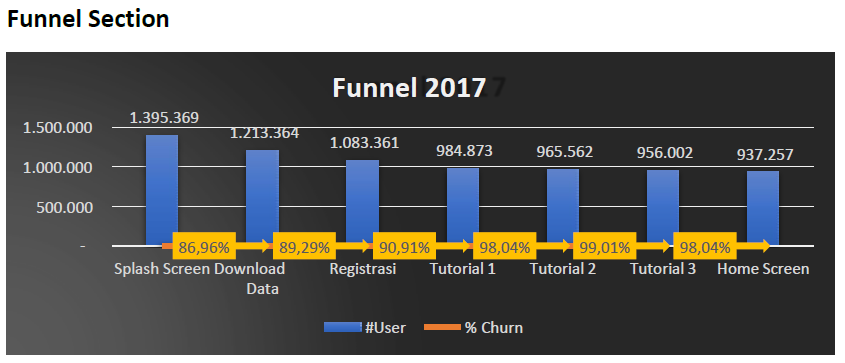

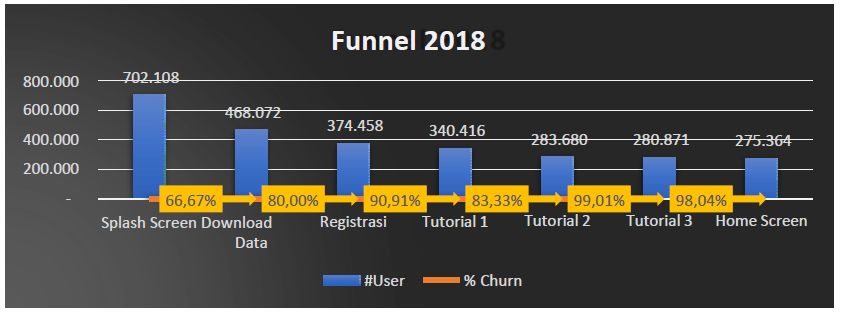

From Funnel, we can see the step-by-step of users when they enter the game. Normally, we used funnel to know the first-time experience user. If the funnel is bad, users will not come back to the game in the next day. But if it’s good, there is a higher chance that users will come back to play the game in the next day.

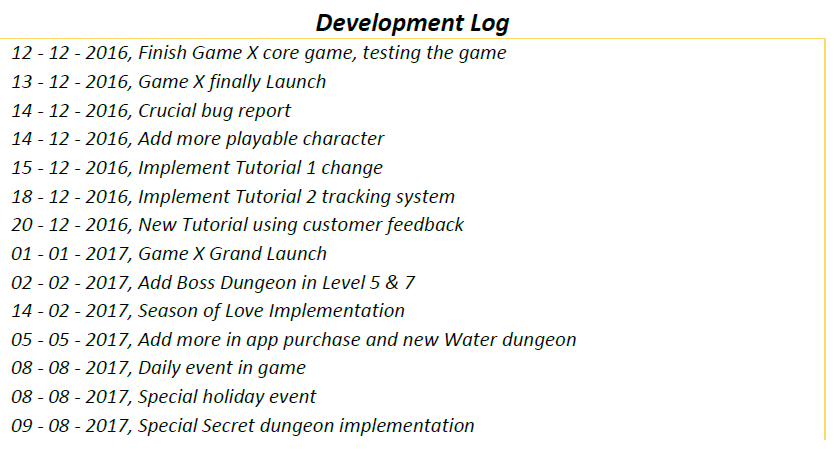

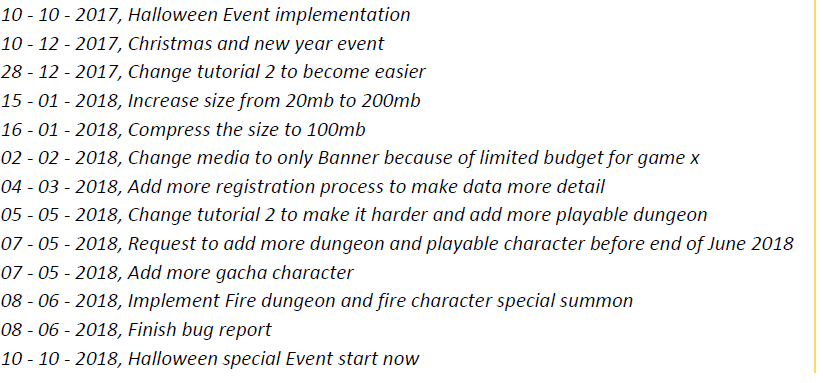

---------------------------------------------------------------------------------------------------------------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data yang sudah diolah pada database MySQL, saya export menjadi file .csv, kemudian saya gunakan untuk menganalisis data.

Data tersebut antara lain:
- Game X performance in 2017 (data2017_new.csv)
- Game X performance in 2018 - Januari 2019 (data2018_new.csv)
- Data User Acquisition yang didapatkan dari Marketing Lead di perusaan tersebut (user_acquisition.csv)

In [3]:
data17 = pd.read_csv('data2017_new.csv')
data18 = pd.read_csv('data2018_new.csv')
data_acq = pd.read_csv('user_acquisition.csv')

In [4]:
data17.head()

,Id,month_,New_User,DAU,D1_Retention,D7_Retention,D30_Retention,Avg_Session,Playtime_day,Paying_user,Gross_Revenue,ARPPU,ARPDAU,Conversion_Rate
0,1,Jan,160402,20389,35.92,7.95,2.24,5,15,700,1955.34,2.79,0.10,0.44
1,2,Feb,110829,17035,34.82,8.26,2.36,5,14,780,1216.28,1.56,0.07,0.70
2,3,Mar,116097,15639,34.87,7.71,1.61,4,14,670,1294.07,1.93,0.08,0.58
3,4,Apr,101066,14716,34.84,8.48,1.90,4,13,570,1190.11,2.09,0.08,0.56
4,5,May,119965,15510,34.72,7.87,2.05,5,15,573,1255.60,2.19,0.08,0.48


In [5]:
data18.head()

,Id,month_,New_User,DAU,D1_Retention,D7_Retention,D30_Retention,Avg_Session,Playtime_day,Paying_user,Gross_Revenue,ARPPU,ARPDAU,Conversion_Rate
0,1,Jan,31856,3753,31.99,5.79,1.31,3,10,100,270.06,2.70,0.07,0.31
1,2,Feb,22337,3320,31.17,5.08,1.30,3,11,84,248.78,2.96,0.07,0.38
2,3,Mar,18563,2642,31.27,5.82,1.17,3,9,80,210.54,2.63,0.08,0.43
3,4,Apr,18151,2478,31.62,5.43,1.52,2,10,70,142.65,2.04,0.06,0.39
4,5,May,20228,2568,31.79,5.24,1.27,2,9,75,181.94,2.43,0.07,0.37


In [6]:
data_acq.head()

,Id,Month_,user_acq_media,result
0,1,Jan17,"Banner, Video",80201
1,2,Mar17,Video,69658
2,3,Jun17,"Banner, Video",47109
3,4,Oct17,"Banner, Carrousel",10042
4,5,Nov17,"Banner, Carrousel",19085


-------------------------------------------------------------------------------------------------------------------------

## Data Preparation and Exploration Data Analyst (EDA)

### data2017.csv

In [7]:
## Membuang Id dari dataset.
data17.drop('Id', axis=1, inplace=True)

In [8]:
data17

,month_,New_User,DAU,D1_Retention,D7_Retention,D30_Retention,Avg_Session,Playtime_day,Paying_user,Gross_Revenue,ARPPU,ARPDAU,Conversion_Rate
0,Jan,160402,20389,35.92,7.95,2.24,5,15,700,1955.34,2.79,0.10,0.44
1,Feb,110829,17035,34.82,8.26,2.36,5,14,780,1216.28,1.56,0.07,0.70
2,Mar,116097,15639,34.87,7.71,1.61,4,14,670,1294.07,1.93,0.08,0.58
3,Apr,101066,14716,34.84,8.48,1.90,4,13,570,1190.11,2.09,0.08,0.56
4,May,119965,15510,34.72,7.87,2.05,5,15,573,1255.60,2.19,0.08,0.48
5,Jun,94217,14645,34.84,7.11,1.70,5,13,890,1145.08,1.29,0.08,0.94
6,Jul,69633,10370,32.74,6.73,1.40,5,12,250,772.78,3.09,0.07,0.36
7,Aug,47090,7361,32.07,6.66,1.35,4,10,220,472.34,2.15,0.06,0.47
8,Sep,35245,5881,30.53,5.68,1.34,3,14,210,415.48,1.98,0.07,0.60
9,Oct,33472,5001,30.89,5.81,1.51,4,12,211,368.48,1.75,0.07,0.63


In [9]:
data17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month_           12 non-null     object 
 1   New_User         12 non-null     int64  
 2   DAU              12 non-null     int64  
 3   D1_Retention     12 non-null     float64
 4   D7_Retention     12 non-null     float64
 5   D30_Retention    12 non-null     float64
 6   Avg_Session      12 non-null     int64  
 7   Playtime_day     12 non-null     int64  
 8   Paying_user      12 non-null     int64  
 9   Gross_Revenue    12 non-null     float64
 10  ARPPU            12 non-null     float64
 11  ARPDAU           12 non-null     float64
 12  Conversion_Rate  12 non-null     float64
dtypes: float64(7), int64(5), object(1)
memory usage: 1.3+ KB


Dari data info terlihat tidak ada missing value, sehingga data siap untuk dianalisis.

In [10]:
data17.describe()

,New_User,DAU,D1_Retention,D7_Retention,D30_Retention,Avg_Session,Playtime_day,Paying_user,Gross_Revenue,ARPPU,ARPDAU,Conversion_Rate
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.00000,12.000000,12.000000
mean,78104.750000,11230.000000,33.064167,6.938333,1.588333,4.250000,12.75000,439.833333,908.859167,2.40500,0.080833,0.555833
std,45240.172418,5755.486363,2.214586,1.126021,0.579856,0.753778,1.76455,284.687654,507.861227,0.90864,0.015050,0.164618
min,17433.000000,3552.000000,29.150000,5.190000,0.110000,3.000000,10.00000,102.000000,368.480000,1.29000,0.060000,0.320000
25%,34801.750000,5661.000000,31.257500,5.810000,1.387500,4.000000,11.75000,210.750000,438.340000,1.88500,0.070000,0.462500
50%,81925.000000,12507.500000,33.730000,6.920000,1.560000,4.000000,13.00000,410.000000,958.930000,2.12000,0.080000,0.570000
75%,112146.000000,15542.250000,34.840000,7.890000,1.937500,5.000000,14.00000,677.500000,1226.110000,2.86500,0.085000,0.607500
max,160402.000000,20389.000000,35.920000,8.480000,2.360000,5.000000,15.00000,890.000000,1955.340000,4.37000,0.110000,0.940000


--------------------------------------------------------------------------------------------------

Meninjau conversion rate dan ARPPU dari Game X berdasarkan deskripsi data pada tahun 2017.

#### Conversion Rate

In [11]:
data17.describe()['Conversion_Rate']

count    12.000000
mean      0.555833
std       0.164618
min       0.320000
25%       0.462500
50%       0.570000
75%       0.607500
max       0.940000
Name: Conversion_Rate, dtype: float64

> Berdasarkan data yang diberikan. Dapat kita lihat, bahwa, rata-rata dari Conversion Rate hanya sebesar **0.55%**. Dari nilai tersebut, dapat kita lihat, game X pada tahun 2017, **belum ter-klasifikasi menjadi game yang sangat baik (very good game)** dilihat dari segi conversion rate.

> Bahkan, pada tahun 2017, Conversion Rate belum pernah menyentuh nilai 2%, dimana **pada tahun 2017, nilai conversion rate maksimum bernilai 0,94%.**

#### ARPPU

In [12]:
data17.describe()['ARPPU']

count    12.00000
mean      2.40500
std       0.90864
min       1.29000
25%       1.88500
50%       2.12000
75%       2.86500
max       4.37000
Name: ARPPU, dtype: float64

> Rata-rata ARPPU pada tahun 2017 bernilai **$2.4**. Dari nilai tersebut, dapat kita lihat, game X pada tahun 2017, **belum ter-klasifikasi menjadi game yang sangat baik (very good game)** dilihat dari segi ARPPU.

> Bahkan, pada tahun 2017, ARPPU belum menyentuh nilai $16, dimana **pada tahun 2017, nilai ARPPU maksimum bernilai $$4.37**

### Data2018.csv

In [13]:
data18.drop('Id', axis=1, inplace=True)

In [14]:
data18

,month_,New_User,DAU,D1_Retention,D7_Retention,D30_Retention,Avg_Session,Playtime_day,Paying_user,Gross_Revenue,ARPPU,ARPDAU,Conversion_Rate
0,Jan,31856,3753,31.99,5.79,1.31,3,10,100,270.06,2.70,0.07,0.31
1,Feb,22337,3320,31.17,5.08,1.30,3,11,84,248.78,2.96,0.07,0.38
2,Mar,18563,2642,31.27,5.82,1.17,3,9,80,210.54,2.63,0.08,0.43
3,Apr,18151,2478,31.62,5.43,1.52,2,10,70,142.65,2.04,0.06,0.39
4,May,20228,2568,31.79,5.24,1.27,2,9,75,181.94,2.43,0.07,0.37
5,Jun,25579,3103,33.00,5.49,0.83,3,11,76,204.36,2.69,0.07,0.30
6,Jul,20261,2357,31.19,5.41,1.36,3,10,60,159.30,2.66,0.07,0.30
7,Aug,18517,2145,31.74,5.20,0.82,4,10,54,138.51,2.57,0.06,0.29
8,Sep,19095,2132,31.26,5.43,1.19,2,10,55,151.43,2.75,0.07,0.29
9,Oct,19537,2106,30.59,5.35,1.19,2,11,55,152.96,2.78,0.07,0.28


In [15]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month_           13 non-null     object 
 1   New_User         13 non-null     int64  
 2   DAU              13 non-null     int64  
 3   D1_Retention     13 non-null     float64
 4   D7_Retention     13 non-null     float64
 5   D30_Retention    13 non-null     float64
 6   Avg_Session      13 non-null     int64  
 7   Playtime_day     13 non-null     int64  
 8   Paying_user      13 non-null     int64  
 9   Gross_Revenue    13 non-null     float64
 10  ARPPU            13 non-null     float64
 11  ARPDAU           13 non-null     float64
 12  Conversion_Rate  13 non-null     float64
dtypes: float64(7), int64(5), object(1)
memory usage: 1.4+ KB


Dari data info terlihat tidak ada missing value, sehingga data siap untuk dianalisis.

In [16]:
data18.describe()

,New_User,DAU,D1_Retention,D7_Retention,D30_Retention,Avg_Session,Playtime_day,Paying_user,Gross_Revenue,ARPPU,ARPDAU,Conversion_Rate
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,24272.153846,2824.230769,31.761538,5.396923,1.163077,2.615385,9.923077,65.153846,192.312308,3.109231,0.067692,0.290769
std,7361.431313,634.179411,0.716890,0.256170,0.216078,0.650444,0.759555,17.319768,44.927669,1.075658,0.007250,0.097763
min,18151.000000,2106.000000,30.590000,5.040000,0.820000,2.000000,9.000000,39.000000,138.510000,2.040000,0.050000,0.100000
25%,19095.000000,2357.000000,31.260000,5.200000,1.050000,2.000000,9.000000,54.000000,152.960000,2.630000,0.070000,0.280000
50%,20261.000000,2635.000000,31.740000,5.410000,1.190000,3.000000,10.000000,60.000000,183.020000,2.700000,0.070000,0.300000
75%,25579.000000,3320.000000,31.990000,5.490000,1.300000,3.000000,10.000000,76.000000,210.540000,2.960000,0.070000,0.370000
max,40174.000000,3881.000000,33.000000,5.820000,1.520000,4.000000,11.000000,100.000000,270.060000,5.790000,0.080000,0.430000


-----------------------------------------------------------------------------

Meninjau conversion rate dan ARPPU dari Game X berdasarkan deskripsi data pada tahun 2018.

#### Conversion Rate

In [17]:
data18.describe()['Conversion_Rate']

count    13.000000
mean      0.290769
std       0.097763
min       0.100000
25%       0.280000
50%       0.300000
75%       0.370000
max       0.430000
Name: Conversion_Rate, dtype: float64

> Berdasarkan data yang diberikan. Dapat kita lihat, bahwa, rata-rata dari Conversion Rate hanya sebesar **0.29%**. Dari nilai tersebut, dapat kita lihat, game X pada tahun 2018, **belum ter-klasifikasi menjadi game yang baik (very good game)**

> Bahkan, pada tahun 2018, Conversion Rate belum pernah menyentuh nilai 2%, dimana **pada tahun 2018, nilai conversion rate maksimum bernilai 0,43%.**

#### ARPPU

In [18]:
data18.describe()['ARPPU']

count    13.000000
mean      3.109231
std       1.075658
min       2.040000
25%       2.630000
50%       2.700000
75%       2.960000
max       5.790000
Name: ARPPU, dtype: float64

> Rata-rata ARPPU pada tahun 2017 bernilai **$3.1**. Dari nilai tersebut, dapat kita lihat, game X pada tahun 2017, **belum ter-klasifikasi menjadi game yang sangat baik (very good game)** dilihat dari segi ARPPU.

> Bahkan, pada tahun 2017, ARPPU belum menyentuh nilai $16, dimana **pada tahun 2017, nilai ARPPU maksimum bernilai $$5.79**

---------------------------------------------------------------------------------------------------------------------

### user_acquisition.csv

In [19]:
data_acq.drop('Id', axis=1, inplace=True)

In [20]:
data_acq

,Month_,user_acq_media,result
0,Jan17,"Banner, Video",80201
1,Mar17,Video,69658
2,Jun17,"Banner, Video",47109
3,Oct17,"Banner, Carrousel",10042
4,Nov17,"Banner, Carrousel",19085
5,Dec17,"Banner, Carrousel",13946
6,Feb18,Banner,4467
7,Jul18,Banner,6078
8,Aug18,Video,8333
9,Sep18,Banner,5729


In [21]:
data_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Month_          10 non-null     object
 1   user_acq_media  10 non-null     object
 2   result          10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


Dari *data info* terlihat tidak ada missing value, sehingga data siap untuk dianalisis.

In [22]:
data_acq.describe()

,result
count,10.000000
mean,26464.800000
std,28516.204484
min,4467.000000
25%,6641.750000
50%,11994.000000
75%,40103.000000
max,80201.000000


In [23]:
list_media = list(data_acq['user_acq_media'].unique())
list_total = []
for item in list_media:
    list_total.append(data_acq[data_acq['user_acq_media']==item]['result'].agg('sum'))
media_akusisi = pd.DataFrame(list_total, index=list_media, columns=['Total User Acquisition'])
media_akusisi

,Total User Acquisition
"Banner, Video",127310
Video,77991
"Banner, Carrousel",43073
Banner,16274


> Dapat dilihat, bahwa User Acquisition paling banyak didapatkan ketika menggunakan media **Banner + Video**

--------------------------------------------------------------------------------------------------------------------------

# Menganalisis Revenue pada Game X

Revenue yang didapatkan Game X didapatkan dari produk yang terjual didalam game, yang disajikan dalam feature/parameter/variabel:
   - Gross Revenue = Revenue yang didapatkan dari in-game produk.
   - Average Revenue per Paying User (ARPPU) = Rata-rata revenue yang didapatkan per paying user.
   - Average Revenue per Daily Active User = Rata-rata revenue yang didapatkan per aktif user per hari.

--------------------------------------------------------------------------------------------------------------

### Melihat korelasi antara data

Data 2017

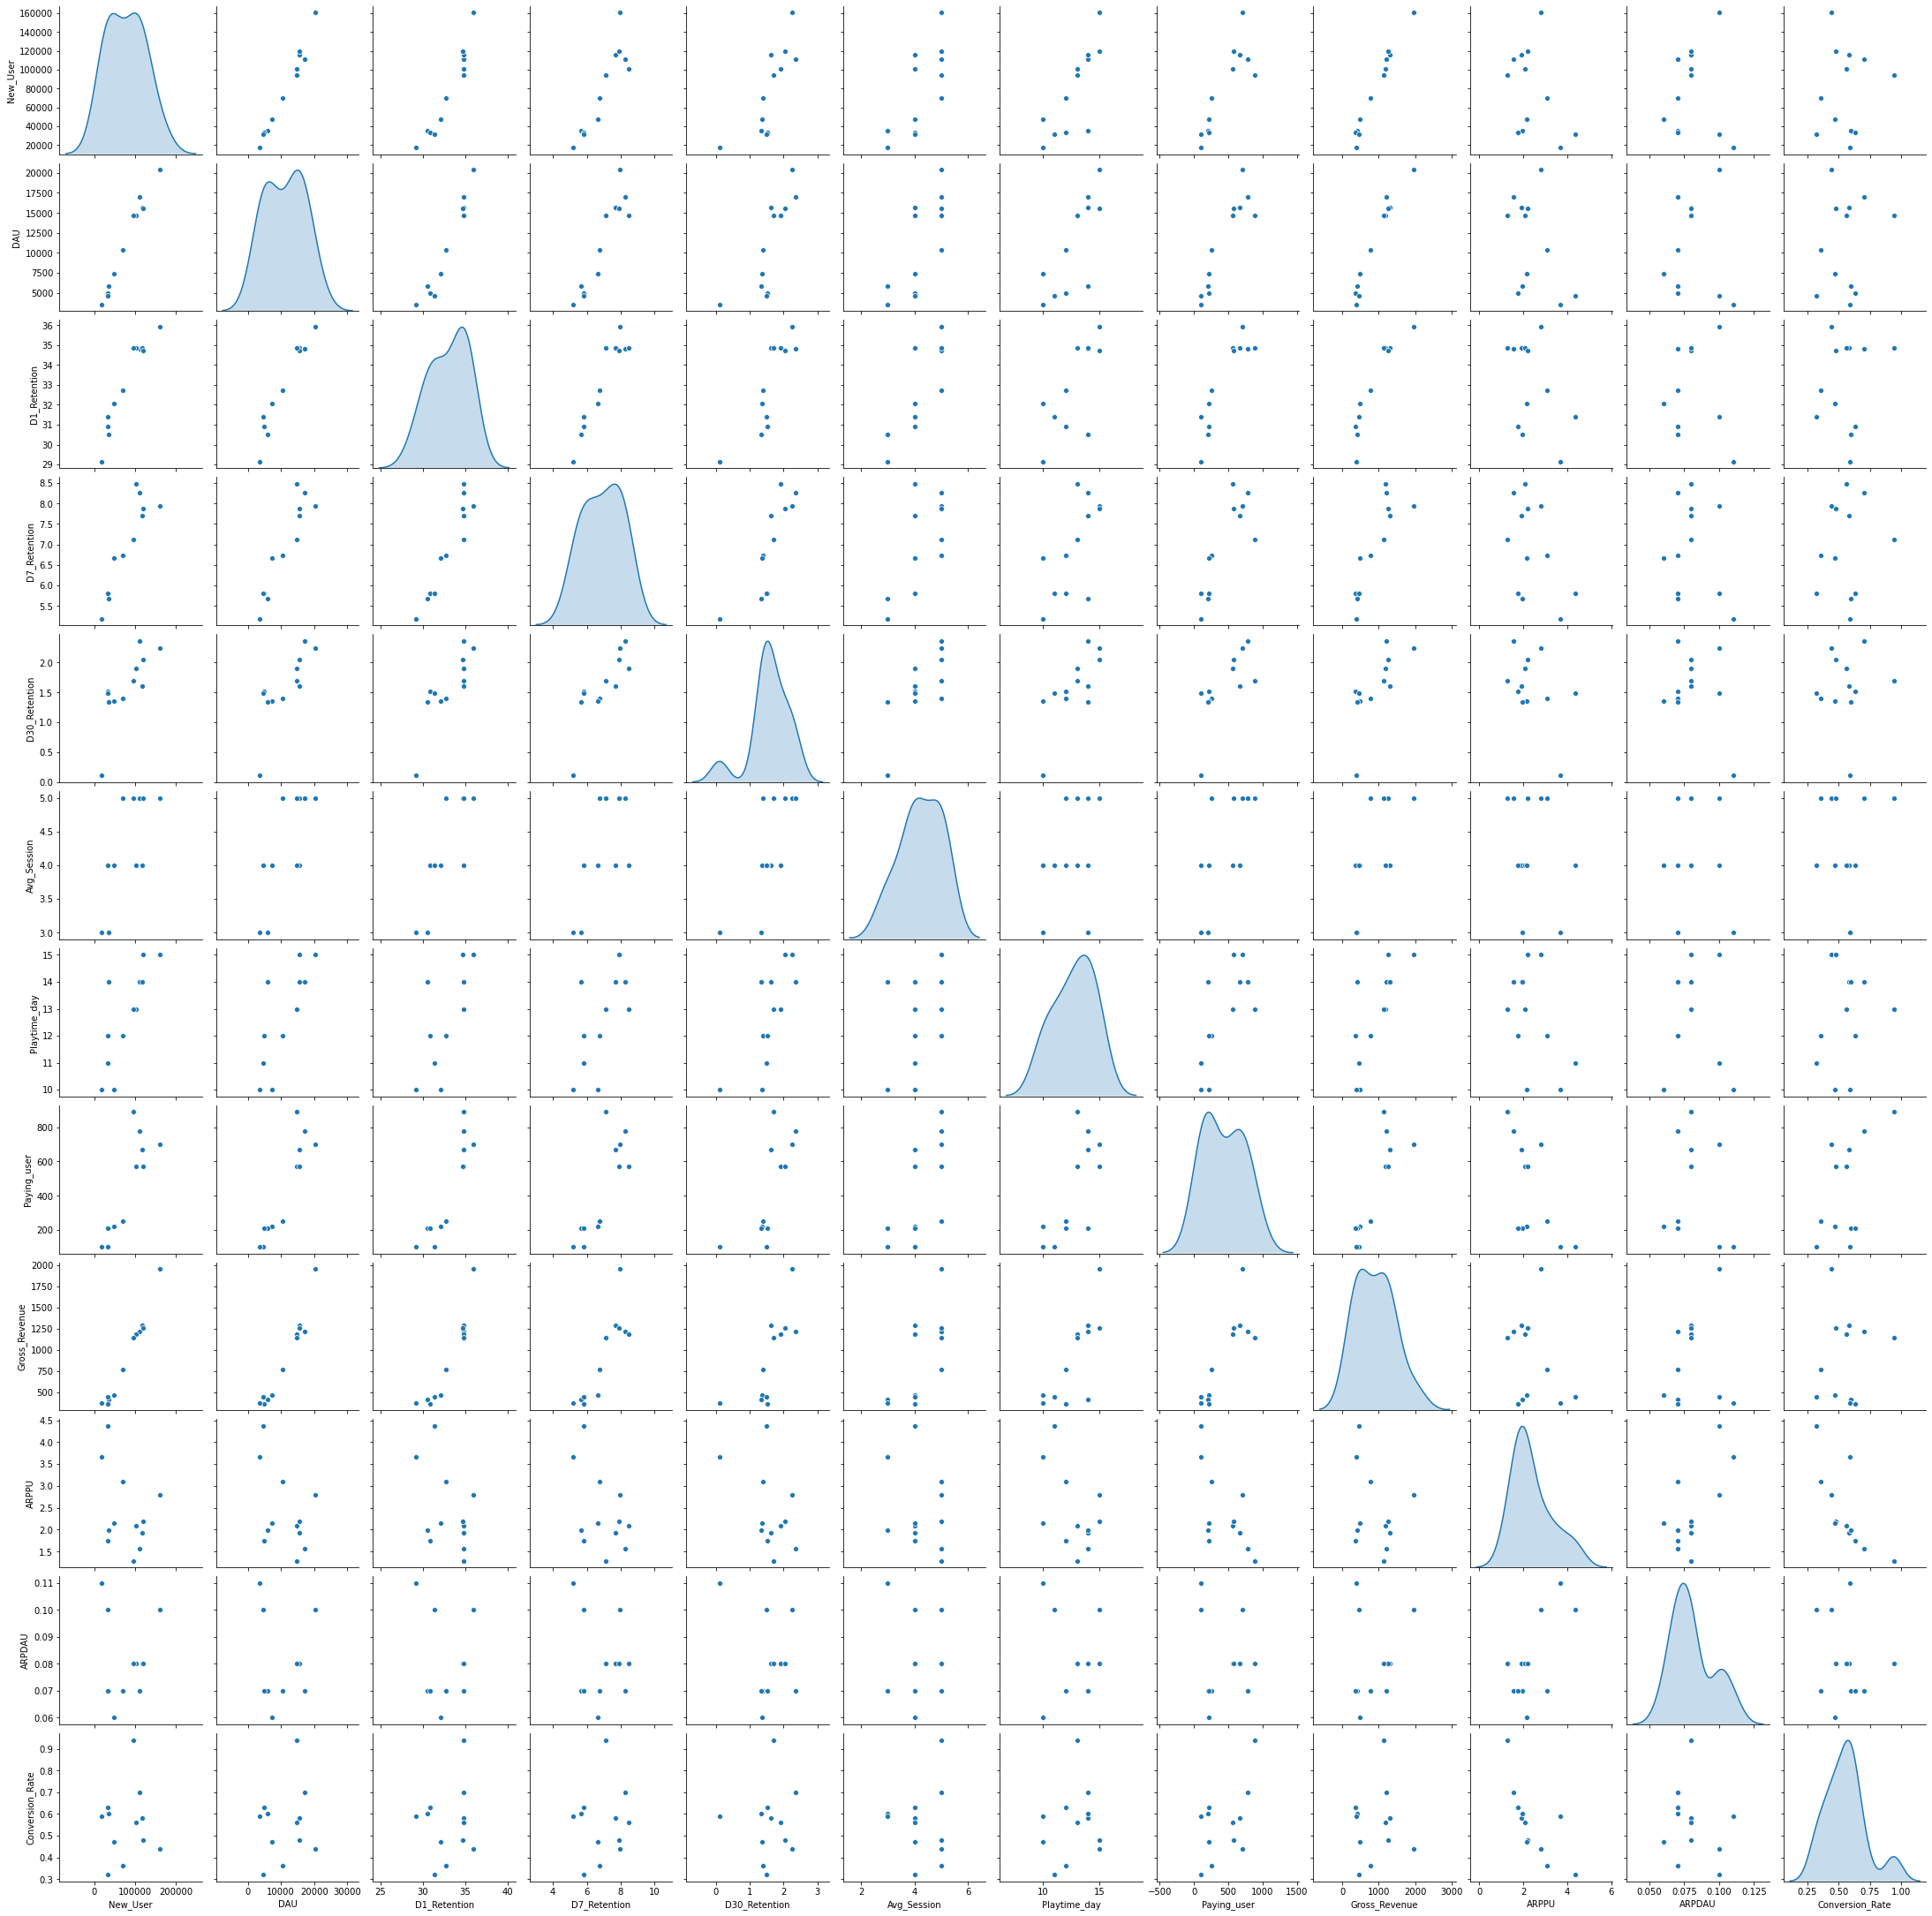

In [24]:
sns.pairplot(data17, diag_kind='kde')

Dapat dilihat dari data, melalui analisis grafik, dapat kita lihat bahwa data tersebut cenderung terdistribusi dengan normal.

Karena data tersebut **terdistribusi dengan normal dan tidak ada outlier data**, maka **korelasi Pearson** saya gunakan.

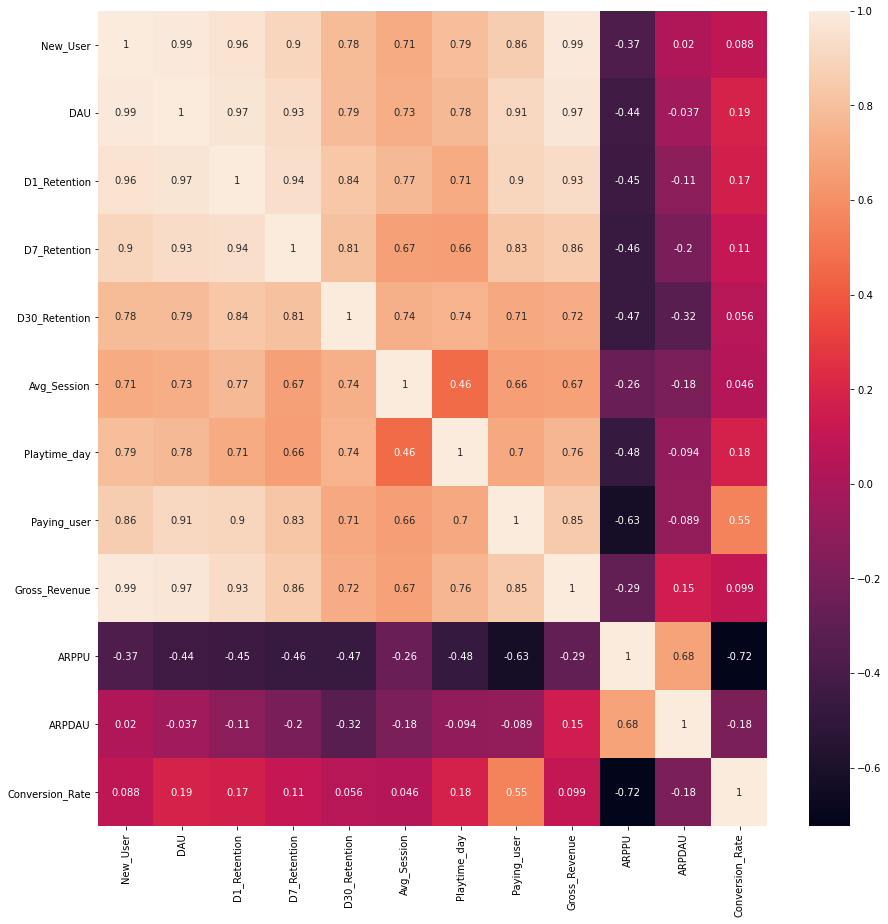

In [25]:
plt.figure(figsize=[15,15])
sns.heatmap(data17.corr(method='pearson'), annot=True)

In [26]:
data17.corr(method='pearson')['Gross_Revenue']

New_User           0.986756
DAU                0.973203
D1_Retention       0.928760
D7_Retention       0.857786
D30_Retention      0.719653
Avg_Session        0.671636
Playtime_day       0.760805
Paying_user        0.849015
Gross_Revenue      1.000000
ARPPU             -0.289562
ARPDAU             0.154666
Conversion_Rate    0.099175
Name: Gross_Revenue, dtype: float64

> Dapat dilihat dari grafik dan nilai korelasi dari Gross Revenue terhadap feature-feature lainnya. Jika diurutkan berdasarkan nilai korelasinya, maka, 2 feature yang paling berpengaruh terhadap Gross Revenue adalah:
**1. New_User** ; **2. DAU**

Data 2018

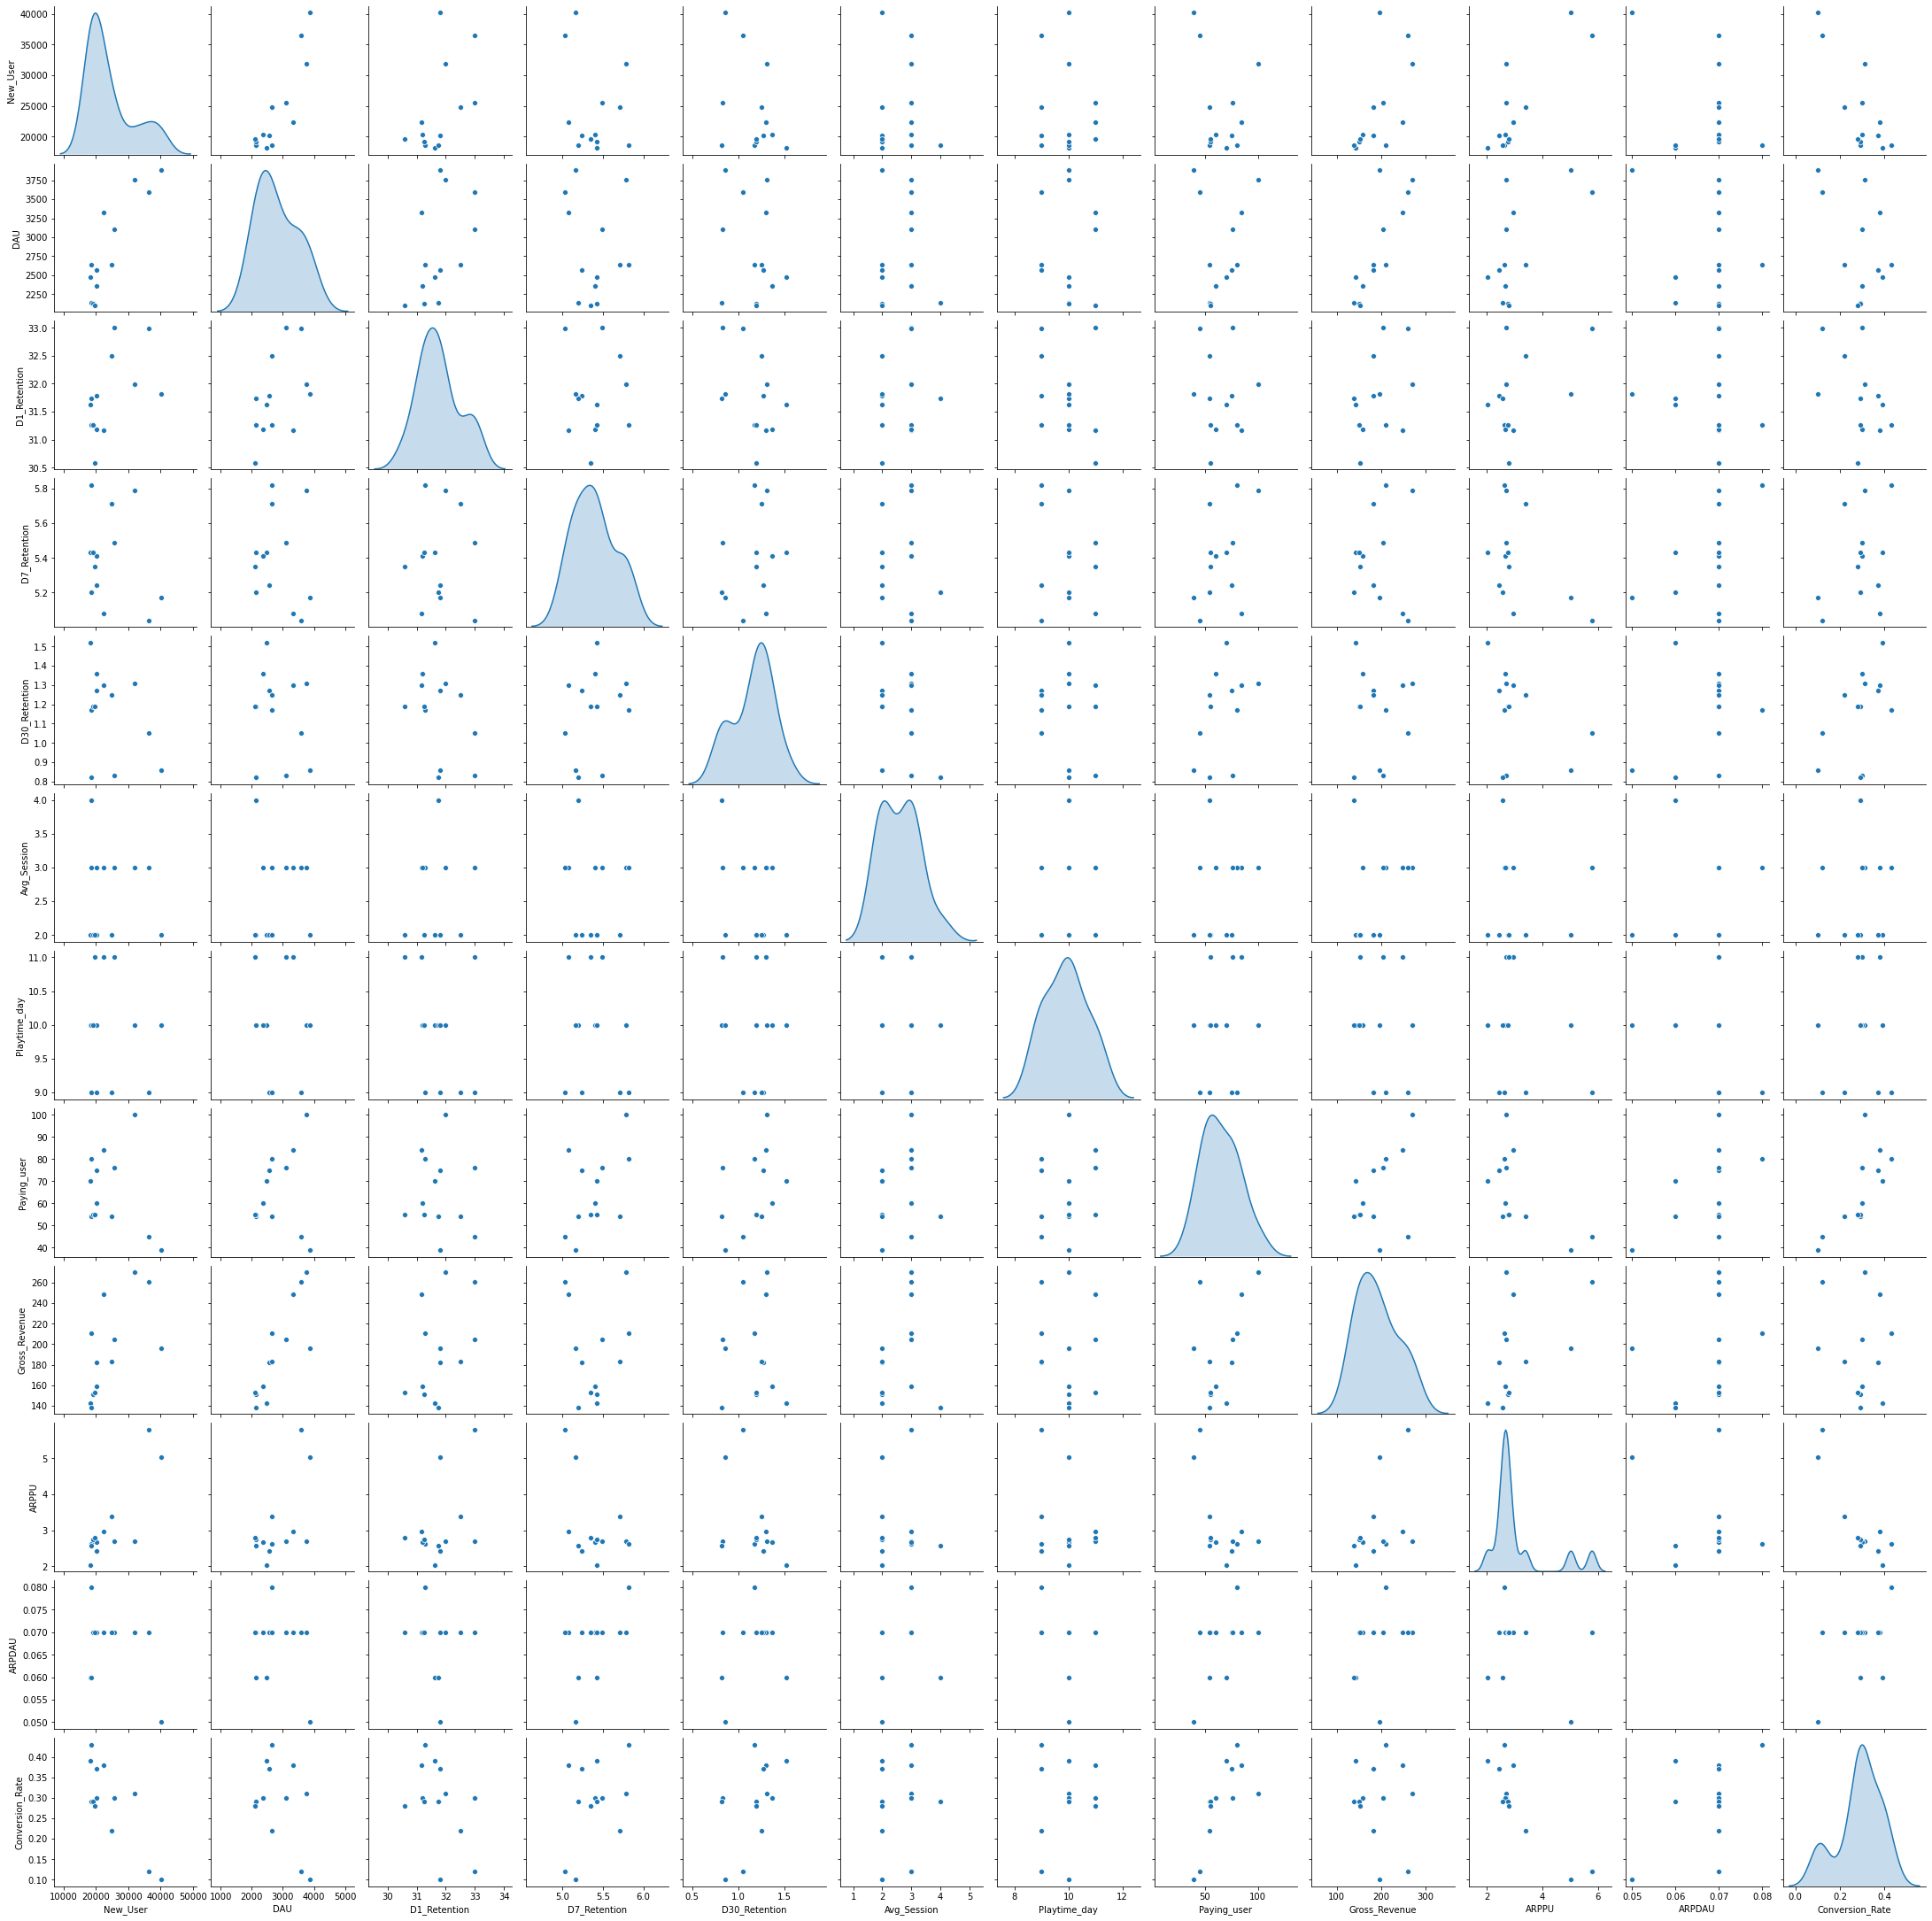

In [27]:
sns.pairplot(data18, diag_kind='kde')

Dapat dilihat dari data, melalui analisis grafik, dapat kita lihat bahwa data tersebut cenderung tidak terdistribusi dengan normal.

Karena data tersebut cenderung **tidak terdistribusi dengan normal dan ada outlier data**, maka **korelasi Spearman** saya gunakan.

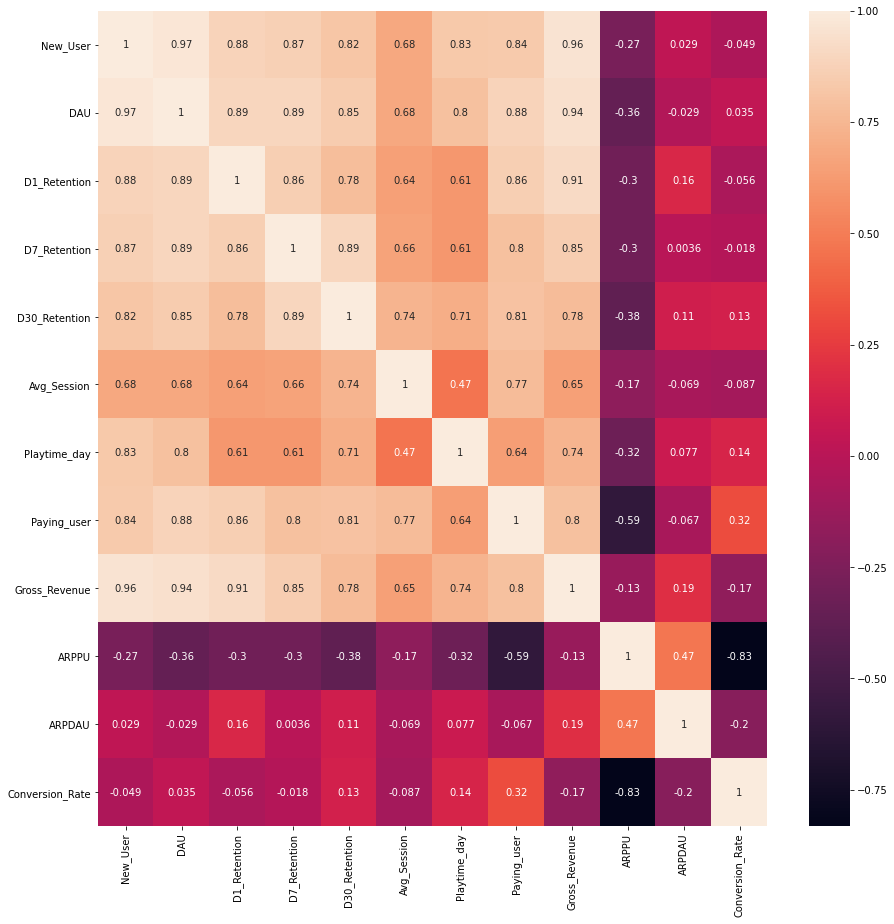

In [28]:
plt.figure(figsize=[15,15])
sns.heatmap(data17.corr(method='spearman'), annot=True)

In [29]:
data18.corr(method='spearman')['Gross_Revenue']

New_User           0.725275
DAU                0.846154
D1_Retention       0.401099
D7_Retention       0.052270
D30_Retention     -0.008253
Avg_Session        0.311800
Playtime_day      -0.126988
Paying_user        0.371902
Gross_Revenue      1.000000
ARPPU              0.489011
ARPDAU             0.460645
Conversion_Rate    0.060606
Name: Gross_Revenue, dtype: float64

> Dapat dilihat dari grafik dan nilai korelasi dari Gross Revenue terhadap feature-feature lainnya. Jika diurutkan berdasarkan nilai korelasinya, maka, 2 feature yang paling berpengaruh terhadap Gross Revenue adalah:
**1. New_User** ; **2. DAU**

-------------------------------------------------------------------------------------------------------------------------

### Menganalisis New_User, DAU dan Gross Revenue.

### New_User

#### Grafik pengguna baru tahun 2017

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

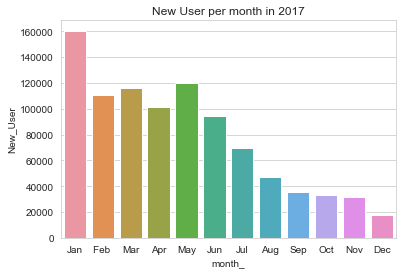

In [30]:
## Grafik pengguna baru tahun 2017
sns.set_style('whitegrid')
sns.barplot(data=data17, x='month_', y='New_User')
plt.title('New User per month in 2017')
plt.tight_layout

>Dari grafik diatas, dapat kita lihat, bahwa **pertambahan user terbanyak** ada pada bulan **Januari**, sedangkan pertambahan user **paling sedikit** terdapat pada bulan **Desember**

>Pertambahan jumlah user baru (*new user*) dari bulan Januari sampai bulan Desember **cenderung menurun**.

#### Grafik pengguna baru tahun 2018

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

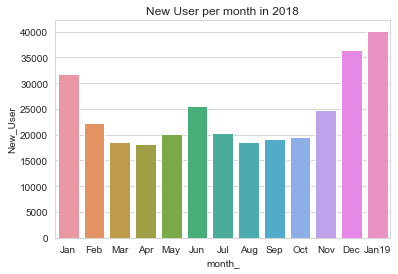

In [31]:
sns.set_style('whitegrid')
sns.barplot(data=data18 , x='month_', y='New_User')
plt.title('New User per month in 2018')
plt.tight_layout

> Pada tahun 2018, jumlah pengguna baru menurun jika dibandingkan tahun 2017, namun jumlah pengguna baru setiap bulannya **cenderung stabil**. Pada tahun 2018, jumlah pengguna baru **terbanyak** terdapat pada bulan **Desember 2018**. 

>Trend pertambahan jumlah pengguna baru tersebut naik pada bulan Januari 2019, namun **jumlah pengguna baru tetap lebih rendah jika dibandingkan dengan  bulan yang sama di tahun 2017**

#### Pengguna Baru Tahun 2017 vs Pengguna Baru Tahun 2018 

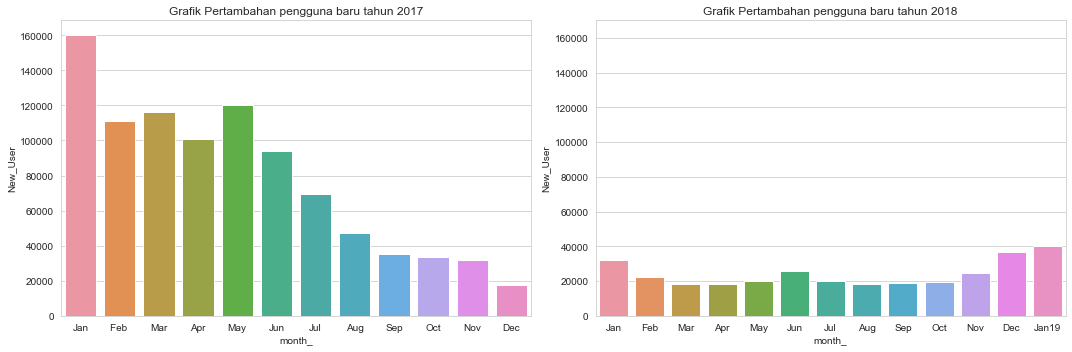

In [32]:
fig, axes= plt.subplots(ncols=2, nrows=1, figsize=[15,5])
sns.barplot(data=data17 , x='month_', y='New_User', ax=axes[0]).set_title('Grafik Pertambahan pengguna baru tahun 2017')
sns.barplot(data=data18 , x='month_', y='New_User', ax=axes[1]).set_title('Grafik Pertambahan pengguna baru tahun 2018')
plt.ylim(0,170000)
plt.tight_layout()

Dapat dilihat, bahwa **jumlah pengguna baru terus menurun, dimulai bulan Juni 2017 sampai dengan tahun 2018.**

### DAU (Daily Active User)

Tahun 2017

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

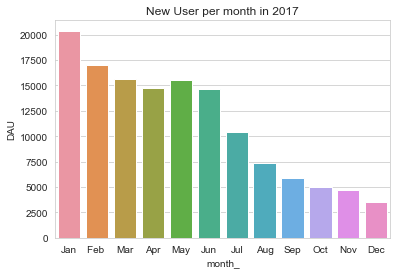

In [33]:
sns.set_style('whitegrid')
sns.barplot(data=data17 , x='month_', y='DAU')
plt.title('New User per month in 2017')
plt.tight_layout

Dapat dilihat, bahwa jumlah pengguna yang online setiap hari (DAU) dari bulan januari 2017 sampai desember 2017 **cenderung menurun**. 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

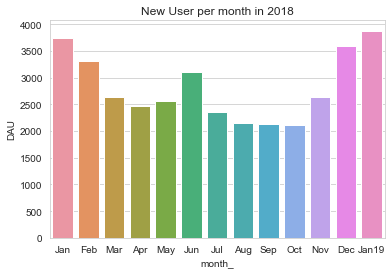

In [34]:
sns.set_style('whitegrid')
sns.barplot(data=data18 , x='month_', y='DAU')
plt.title('New User per month in 2018')
plt.tight_layout

Dapat dilihat, bahwa jumlah pengguna yang online setiap hari (DAU) pada tahun 2018, **fluktuatif**

#### DAU Tahun 2017 VS DAU Tahun 2018

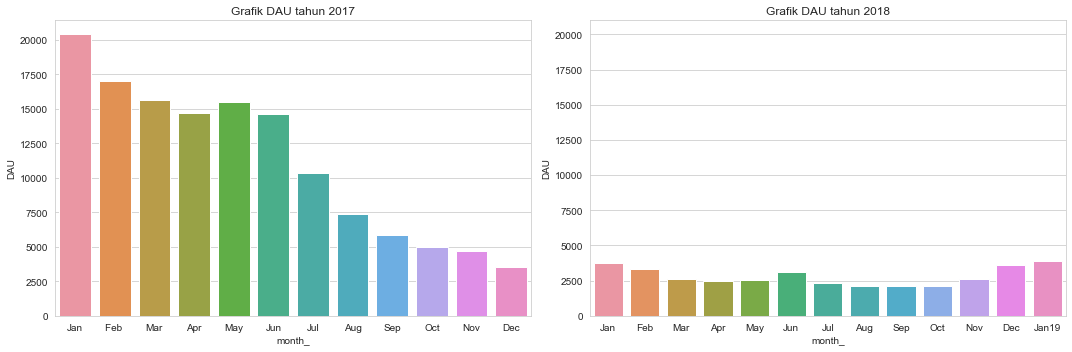

In [35]:
fig, axes= plt.subplots(ncols=2, nrows=1, figsize=[15,5])
sns.barplot(data=data17 , x='month_', y='DAU', ax=axes[0]).set_title('Grafik DAU tahun 2017')
sns.barplot(data=data18 , x='month_', y='DAU', ax=axes[1]).set_title('Grafik DAU tahun 2018')
plt.ylim(0,21000)
plt.tight_layout()

Dapat dilihat, bahwa **jumlah pengguna yang aktif setiap harinya (DAU) terus menurun dari awal tahun 2017, dan kemudian cenderung stabil pada akhir tahun 2017 sampai tahun 2018**.

### Gross Revenue

#### Data 2017 VS Data 2018

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

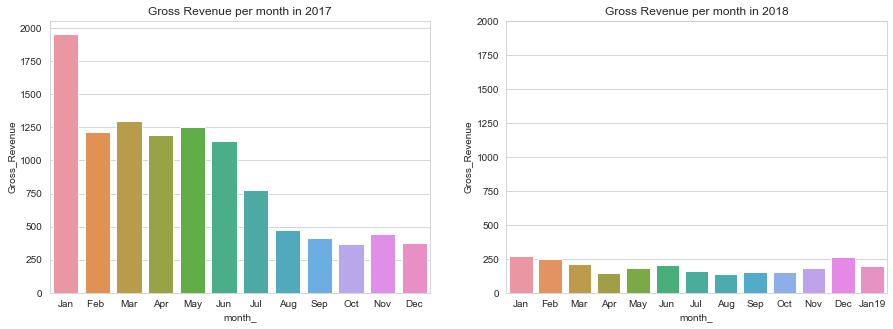

In [36]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.barplot(y=data17['Gross_Revenue'],x=data17['month_'], ax=axes[0]).set_title('Gross Revenue per month in 2017')
sns.barplot(y=data18['Gross_Revenue'],x=data18['month_'], ax=axes[1]).set_title('Gross Revenue per month in 2018')
plt.ylim(0,2000)
plt.tight_layout

> Dapat kita lihat, bahwa terjadi penurunan Gross Revenue dari tahun 2017 sampai 2018.

#### Hal yang menarik, adalah grafik New_User, DAU, dan Gross Revenue memili trend yang sama.

### Dari grafik dan nilai korelasi, dapat kita lihat, bahwa Gross Revenue sangat berkaitan dengan New_User dan DAU (Daily Active User).

-------------------------------------------------------------------------------------------------------------------------

## Analisis Feature-feature lainnya.

In [37]:
data17.columns

Index(['month_', 'New_User', 'DAU', 'D1_Retention', 'D7_Retention',
       'D30_Retention', 'Avg_Session', 'Playtime_day', 'Paying_user',
       'Gross_Revenue', 'ARPPU', 'ARPDAU', 'Conversion_Rate'],
      dtype='object')

### D1_Retention

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

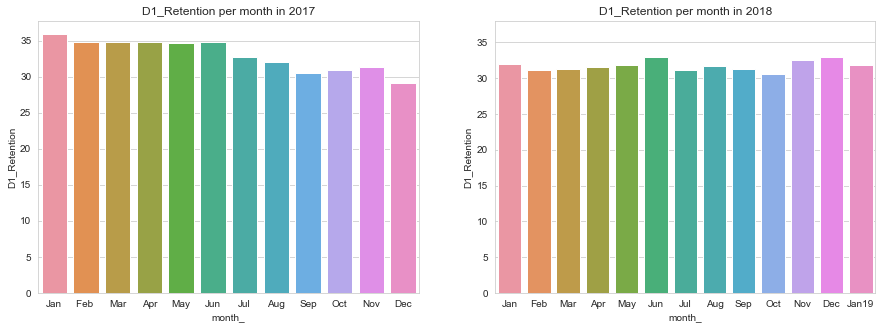

In [38]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.barplot(y=data17['D1_Retention'],x=data17['month_'], ax=axes[0]).set_title('D1_Retention per month in 2017')
sns.barplot(y=data18['D1_Retention'],x=data18['month_'], ax=axes[1]).set_title('D1_Retention per month in 2018')
plt.ylim(0,38)
plt.tight_layout

> Dilihat dari data, ada sekitar **30-35%** dari total keseluruhan pemain/pengguna, yang memainkan game X dia awal bulan.

### D7_Retention

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

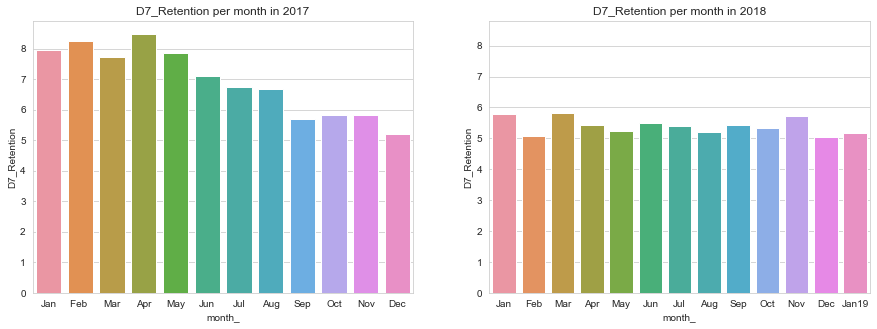

In [39]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.barplot(y=data17['D7_Retention'],x=data17['month_'], ax=axes[0]).set_title('D7_Retention per month in 2017')
sns.barplot(y=data18['D7_Retention'],x=data18['month_'], ax=axes[1]).set_title('D7_Retention per month in 2018')
plt.ylim(0,8.8)
plt.tight_layout

> Dari data, ada sekitar **5-8%** pemain yang memainkan game X di minggu pertama setiap bulannya.

### D30_Retention

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

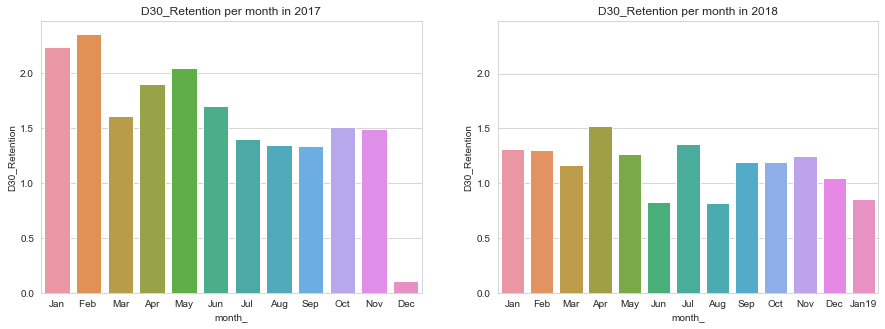

In [40]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.barplot(y=data17['D30_Retention'],x=data17['month_'], ax=axes[0]).set_title('D30_Retention per month in 2017')
sns.barplot(y=data18['D30_Retention'],x=data18['month_'], ax=axes[1]).set_title('D30_Retention per month in 2018')
plt.ylim(0,2.48)
plt.tight_layout

> Ada sekitar **1-2%** pemain yang memainkan game X di akhir bulan.

> **Dari ketiga data (D1_Retention, D7_Retention, D30_Retention), saya menganalisis bahwa pemain lebih banyak memainkan permainan di awal bulan. Apabila melihat development log dari Game X, event-event yang berada pada akhir bulan tidak banyak (relatif tidak ada). Saya berhipotesis hal tersebut menjadi salah satu faktor jumlah pemain pada akhir bulan, lebih sedikit jika dibandingkan pada awal bulan. Namun, masih kurang bukti/data untuk menarik kesimpulan dari analisis tersebut.**

### Avg_Session

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

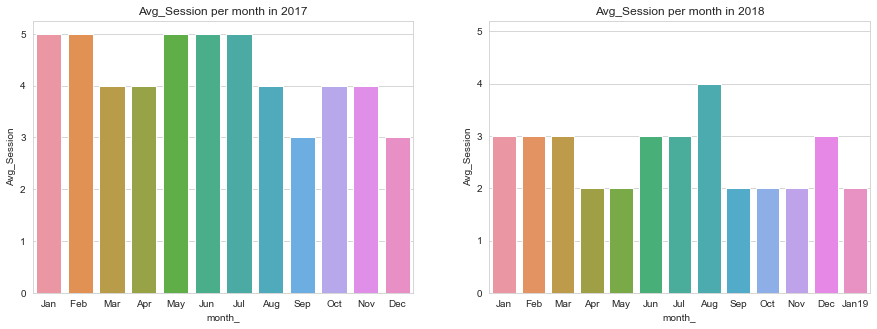

In [41]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.barplot(y=data17['Avg_Session'],x=data17['month_'], ax=axes[0]).set_title('Avg_Session per month in 2017')
sns.barplot(y=data18['Avg_Session'],x=data18['month_'], ax=axes[1]).set_title('Avg_Session per month in 2018')
plt.ylim(0,5.2)
plt.tight_layout

> Dapat dilihat, rata-rata pengguna hanya memainkan Game X **3-5** kali perbulan pada tahun 2017, dan **2-3** kali perbulan pada tahun 2018.

### Playtime_day

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

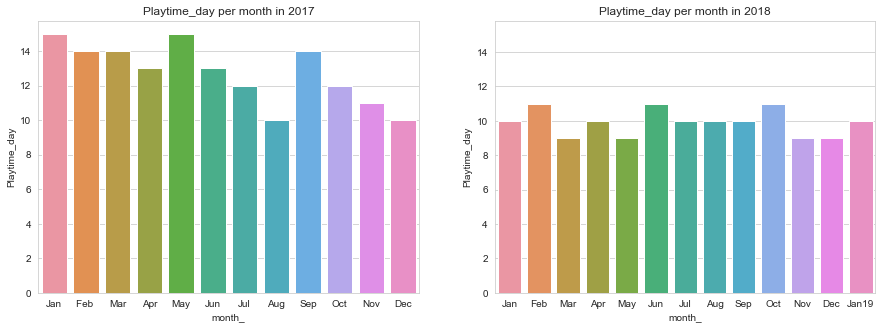

In [42]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.barplot(y=data17['Playtime_day'],x=data17['month_'], ax=axes[0]).set_title('Playtime_day per month in 2017')
sns.barplot(y=data18['Playtime_day'],x=data18['month_'], ax=axes[1]).set_title('Playtime_day per month in 2018')
plt.ylim(0,15.8)
plt.tight_layout

> Rata-rata waktu pemain bermain perhari disetiap bulan cenderung konstan, namun mengalami penurunan dari tahun 2017 menuju 2018.

> Belum cukup data yang dapat digunakan untuk memberikan kesimpulan kenapa terjadi penurunan dari rata-rata waktu pemain bermain perhari disetiap bulannya. Namun, **saya memberikan hipotesis, bahwa penurunan ini disebabkan oleh perfoma Game X**.

### Paying User

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

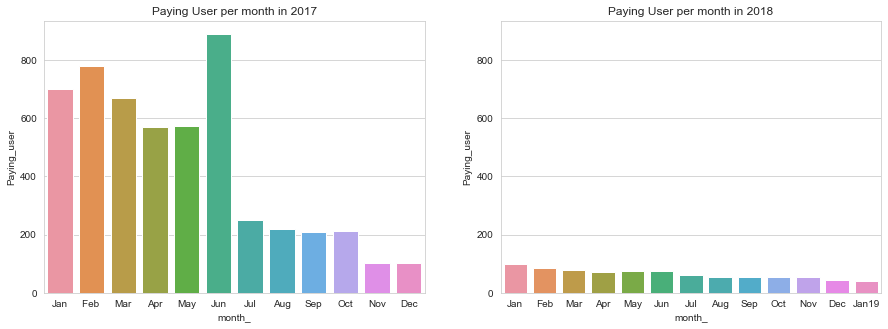

In [43]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.barplot(y=data17['Paying_user'],x=data17['month_'], ax=axes[0]).set_title('Paying User per month in 2017')
sns.barplot(y=data18['Paying_user'],x=data18['month_'], ax=axes[1]).set_title('Paying User per month in 2018')
plt.setp(axes, ylim=axes[0].get_ylim())
plt.tight_layout

> Terdapat penurunan yang signifikan jumlah pemain yang melakukan pembayaran pada Game X

### ARPPU

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

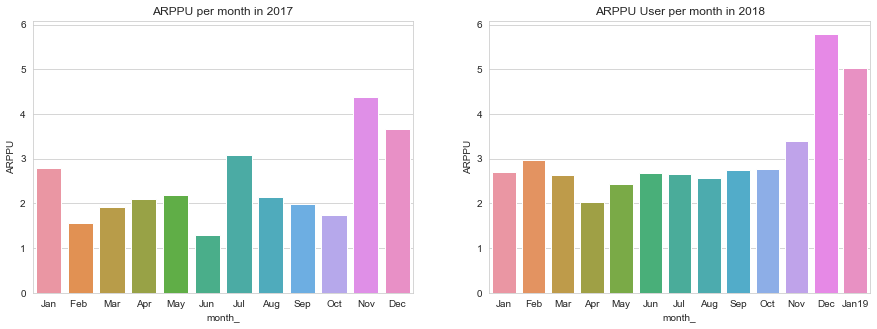

In [44]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.barplot(y=data17['ARPPU'],x=data17['month_'], ax=axes[0]).set_title('ARPPU per month in 2017')
sns.barplot(y=data18['ARPPU'],x=data18['month_'], ax=axes[1]).set_title('ARPPU User per month in 2018')
plt.setp(axes, ylim=axes[1].get_ylim())
plt.tight_layout

> Ada hal menarik dari data diatas, dimana berbeda dengan data feature lainnya, nilai ARPPU pada tahun 2018, cenderung naik jika dibandingkan pada tahun 2017.

> Apabila dilihat dari Development Log, **saya berhipotesis kenaikan tersebut disebabkan beberapa perubahan pada Game X yang dilakukan pada tahun 2018, seperti penambahan Gacha Character dan penambahan beberapa event pada game.**

### ARPDAU

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

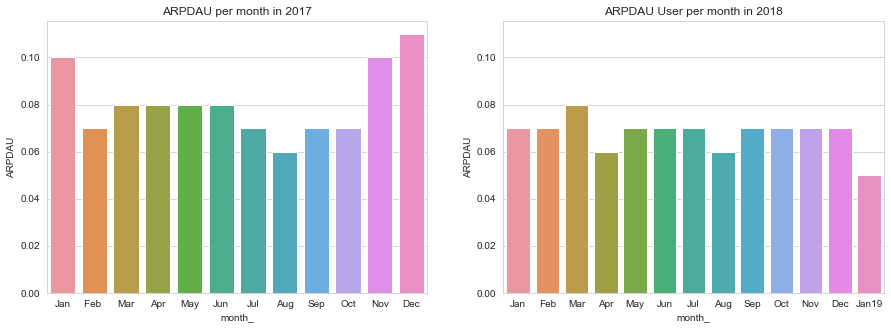

In [45]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.barplot(y=data17['ARPDAU'],x=data17['month_'], ax=axes[0]).set_title('ARPDAU per month in 2017')
sns.barplot(y=data18['ARPDAU'],x=data18['month_'], ax=axes[1]).set_title('ARPDAU User per month in 2018')
plt.setp(axes, ylim=axes[0].get_ylim())
plt.tight_layout

> Dapat dilihat, terjadi penurunan ARPDAU dari tahun 2018. Hal ini linear pula dengan penurunan nilai DAU dan New_User Game X pada tahun 2018

### Conversion_Rate

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

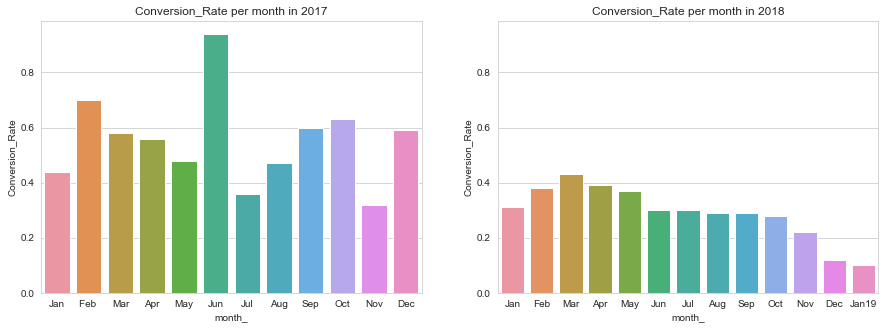

In [46]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.barplot(y=data17['Conversion_Rate'],x=data17['month_'], ax=axes[0]).set_title('Conversion_Rate per month in 2017')
sns.barplot(y=data18['Conversion_Rate'],x=data18['month_'], ax=axes[1]).set_title('Conversion_Rate per month in 2018')
plt.setp(axes, ylim=axes[0].get_ylim())
plt.tight_layout

----------------------------------------------------------------------------------------------------------------------



### Menganalisis User_Acquisition_Media terhadap Gross Revenue, New_User, dan DAU

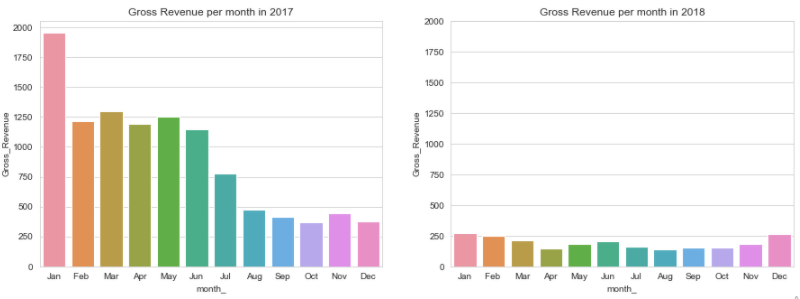

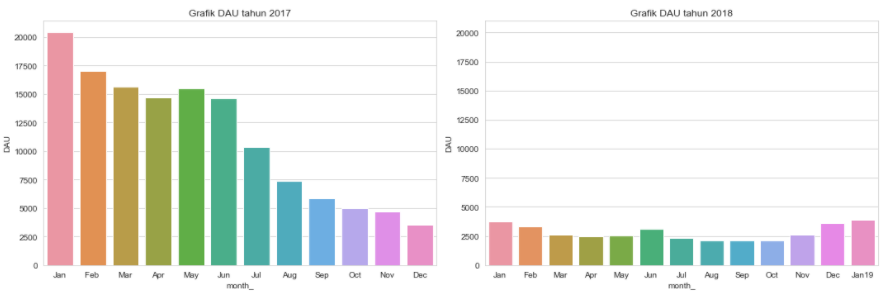

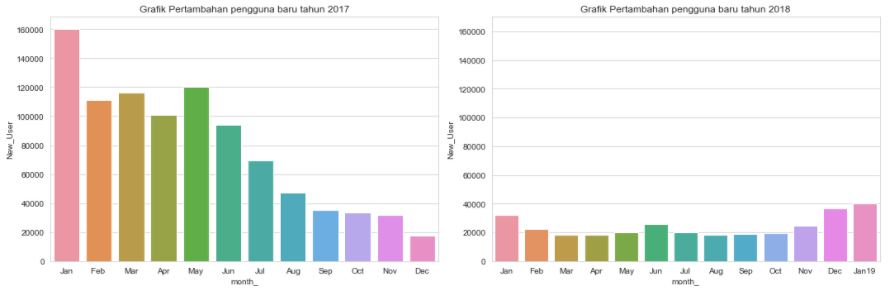

In [47]:
data_acq

,Month_,user_acq_media,result
0,Jan17,"Banner, Video",80201
1,Mar17,Video,69658
2,Jun17,"Banner, Video",47109
3,Oct17,"Banner, Carrousel",10042
4,Nov17,"Banner, Carrousel",19085
5,Dec17,"Banner, Carrousel",13946
6,Feb18,Banner,4467
7,Jul18,Banner,6078
8,Aug18,Video,8333
9,Sep18,Banner,5729


> Dari data-data tersebut, dapat kita lihat, bahwa media yang digunakan untuk meng-akusisi user baru sangat berpengaruh, dimana seperti yang sudah dilakukan sebelumnya, bahwa urutan media yang berpengaruh adalah sebagai berikut:

In [48]:
media_akusisi

,Total User Acquisition
"Banner, Video",127310
Video,77991
"Banner, Carrousel",43073
Banner,16274


> Dapat dilihat, bahwa User Acquisition paling banyak didapatkan ketika menggunakan media **Banner + Video**

> **Berdasarkan *Development Log* yang ada, saya menganalisis salah satu faktor yang menyebabkan penurunan jumlah pengguna baru atau New_User adalah perubahan strategi akusisi pengguna, dengan merubah metode/media untuk meng-akuisisi pengguna baru.**

---------------------------------------------------------------------------------------------------------------------------

## Menganalisis Performa dari Game X

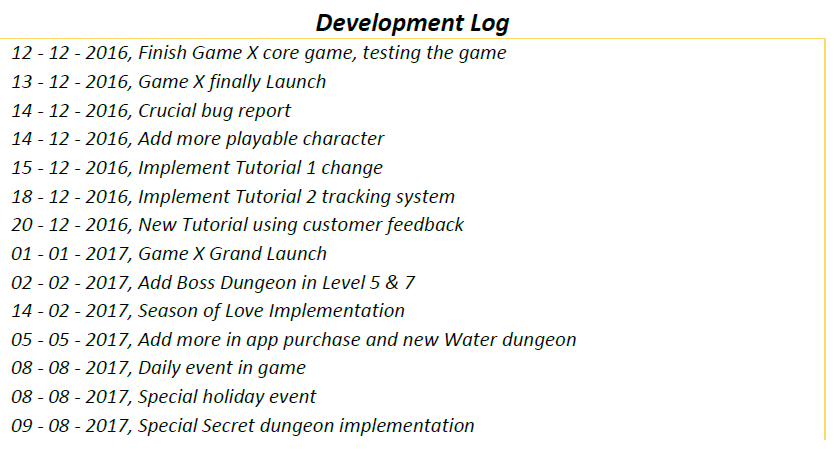

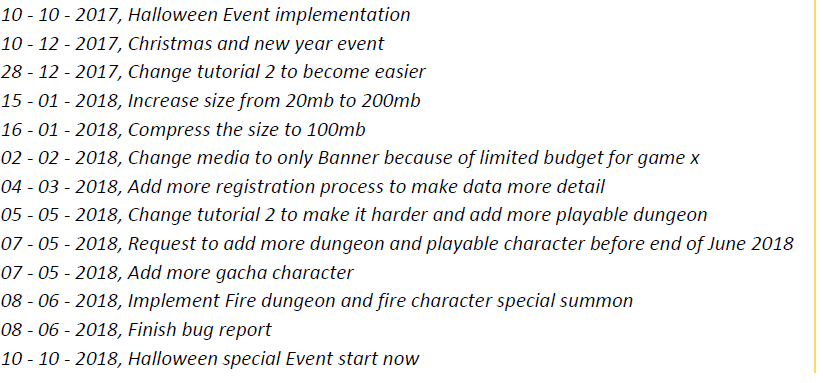

------------------------------------------------------------------

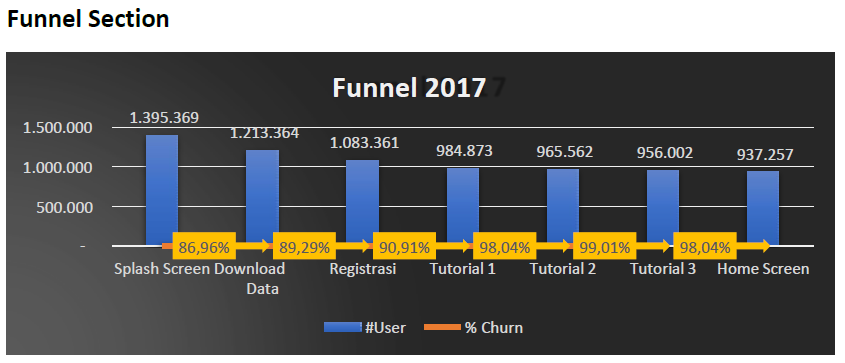

#### Analisis :

Berdasarkan analisis grafik, pada tahun 2017, jumlah pengguna *aplikasi/game X*, **TIDAK** melanjutkan ke tahap *Download Data* sebesar 13.04%

Ada banyak faktor yang menyebabkan kenapa pengguna *aplikasi/game X* tidak melanjutkan ke tahap *Download Data*. Akan tetapi, **Tidak cukup data untuk mengambil kesimpulan kenapa pengguna game X tidak melanjutkan ketahap tersebut.**

Dilihat dari development log pada tahun 2017, belum cukup data/informasi yang dapat dianalisis pengaruhnya terhadap nilai Churn.

Secara keseluruhan, jumlah pengguna game X, yang churn ke tahap selanjutnya, kurang dari 10%. Menurut saya, hal tersebut sudah bagus, namun **untuk menganalisa lebih lanjut, diperlukan beberapa data tambahan, seperti Record Aktivitas Pengguna, Data Personal (Gender, Umur, Minat, dll), sehingga dapat dianalisis pengaruh apa saja yang mempengaruhi persentase nilai Churn.**

-------------------------------------------------

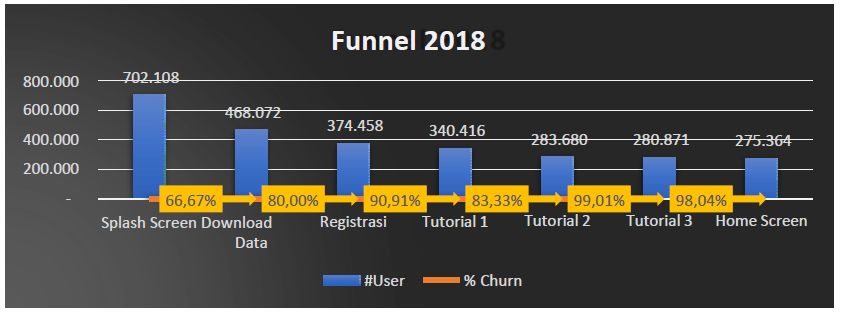

#### Analisis:

Berdasarkan analisis grafik funnel pada tahun 2018, jumlah pengguna  *aplikasi/game X* yang **tidak melanjutkan ketahap *Download Data*, sebesar 33.33%**

Berdasarkan development log yang ada, saya menganalisis hal tersebut terjadi, dikarenakan adanya perubahan besar data yang harus di download pengguna. (Yang awalnya 20Mb menjadi 200Mb, kemudian di compress menjadi 100Mb)

Kemudian, jumlah pengguna yang tidak lanjut ke tahap registrasi setelah melalui proses download data, sebesar 20%.

Saya melihat, 20% merupakan nilai yang cukup besar. Berdasarkan development log, saya menganalisis hal ini terjadi dikarenakan perubahan proses registrasi.

Tentunya banyak faktor yang bisa mempengaruhi nilai churn tersebut. Diperlukan beberapa data tambahan guna menganalisis lebih lanjut.

Kemudian, dari tutorial 1 yang tidak melanjutkan ke tutorial 2, sebesar 16.67%. Berdasarkan development log, saya menganalisis hal tersebut terjadi setelah adanya perubahan pada tutorial 2. Namun, masih diperlukan beberapa data tambahan untuk menganalisis lebih lanjut.

## Conclusions

 1. Berdasarkan data yang ada, dilihat dari segi conversion rate dan ARPPU, pada tahun 2017 & 2018, Game X belum dapat diklasifikasikan menjadi game yang sangat baik (very good game). (Conversion Rate kurang dari 2%, dan nilai ARPPU kurang dari $16).

2. Berdasarkan analisis yang dilakukan, dapat dilihat, New_User, dan DAU menjadi 2 buah variable yang paling menentukan nilai Gross_Revenue.

3. Pada performa game, terlihat nilai Churn dari user mengalami pengurangan dari Splash Screen menuju Download data, dari Download Data menunju Registrasi, dari Registrasi menuju Tutorial 1, dan dari Tutorial 1 menuju Tutorial 2. Hal tersebut dikarenakan beberapa perubahan dari game X yang dilakukan oleh development team, yang ternyata menurunkan nilai Churn dari user.

4. Media yang digunakan untuk meng-akuisisi user berpengaruh pada jumlah user yang didapatkan. Dimana, media akuisisi terbaik sampai saat ini, adalah Banner + Video.

5. Belum cukup data untuk menganalisis lebih lanjut, faktor-faktor apa saja yang dapat meningkatkan New User dan DAU pada Game X. **(Diperlukan data tambahan)**

6. Pemain lebih banyak memainkan Game X diawal bulan.

## Question

### 1. What do you think is 2 most Important KP's that Tim must know to increase Game X Revenue ?

Dari analisis yang dilakukan, **jumlah pengguna baru (New_User)** dan **jumlah pemain Game X per hari (DAU)** merupakan 2 parameter terpenting untuk meningkatkan Revenue dari Game X.

### 2. What do you think is the problem of Game X?

1. **Penurunan Revenue dari game X**, berkaitan dengan pengguna baru (New_User) dan jumlah pemain Game X per hari (DAU). Berdasarkan data yang ada, penurunan New_User terjadi akibat **perubahan media akuisisi yang dilakukan** oleh team Marketing. Akan tetapi, belum cukup data untuk menganalisis penyebab dari penurunan DAU. Saya memberikan sebuah hipotesis, bahwa **penurunan DAU tersebut berkaitan dengan performa game**.

2. **Penurunan performa game X terjadi akibat perubahan yang dilakukan oleh team Development** yang ternyata menurunkan nilai Churn dari pengguna Game X.

> **Saya menyimpulkan bahwa permasalahan dari Game X terdapat pada proses pengembangan game yang menyebabkan nilai Churn dari beberapa sesi menurun sehingga berdampak pada Performa dari Game X. Selain itu, pemilihan media untuk meng-akuisisi pengguna baru mempengaruhi jumlah new user yang didapatkan, dan turut berdampak pada Revenue dari Game X.**

### 3. What suggestion you will  give as data analyst to help Tim increase both Performance and Revenue?

Sebagai data analyst, saya menyarankan kepada Tim beberapa hal untuk meningkatkan performa dan revenue dari Game X, antara lain:
1. **Meninjau kembali metode marketing**. Berdasarkan data, media terbaik pada proses *user acquisition* Game X adalah Banner + Video. Dengan pemilihan media marketing yang tepat (Banner+Video) akan meningkatkan jumlah pengguna baru sehingga akan mempengaruhi Revenue yang didapatkan.
2. **Meninjau kembali pengembangan Game X**. Berdasarkan hasil analisis, jumlah pemain lebih banyak bermain di awal bulan dibandingkan pada pertengahan dan akhir bulan, hal ini disinyalir berkaitan dengan adanya event di awal bulan yang tidak ditemukan pada periode lain (Dilihat dari Development Log). Maka dari itu, saya menyarankan untuk menambah dan mempertahankan event disepanjang bulan. Hal ini dapat meningkatkan jumlah DAU (Daily Active User) pada setiap bulan, sehingga meningkatkan Revenue dari Game X.
3. Untuk meningkatkan nilai Churn, saya menyarankan untuk dilakukan peninjauan kembali terkait development dari Game X, karena terlihat dari data, beberapa perubahan; seperti perubahan ukuran data, perubahan metode registrasi, dan perubahan konten game (tutorial 2),dan lain sebagainya; justru menurunkan nilai Churn.

-----------------------------------------------------